## Action Recognition Model Training & Testing

In [31]:
import csv
import os
from static_constants import FRAMES_PER_TRAINING, TRAININGS_PER_LABEL, ACTION_LABELS_PATH, KEYPOINTS_PATH
import numpy as np

In [32]:
from static_files_io import readActionLabels, readActionMapping

static_labels = readActionLabels()
static_labels

['A']

In [33]:
static_mapping = readActionMapping()
static_mapping

{'A': '0'}

### 1. Preprocess Data

In [34]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [41]:
features, labels = [], []

for static in static_labels:
    sequence = np.load(os.path.join(KEYPOINTS_PATH, f"{static}.npy"))
    # seperate out the features and labels
    for i in range(len(sequence)):
    # for i in range(TRAININGS_PER_LABEL):
        features.append(sequence[i])
        labels.append(static_mapping[static])
      
print(len(features))
print(len(labels))
print(features)
print(labels)

103
103
[array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.      

In [42]:
X = np.array(features)
X.shape

(103, 240)

In [43]:
y = to_categorical(labels).astype(int)
y.shape

(103, 1)

In [44]:
X.nbytes

197760

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(77, 240)
(26, 240)
(77, 1)
(26, 1)


2. Model Compiling

In [47]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import TensorBoard

In [48]:
LOG_PATH = os.path.join("log")
tb_callback = TensorBoard(log_dir=LOG_PATH)

In [51]:
modelInputSize = (X.shape[1],1)
modelInputSize

(240, 1)

In [54]:
# Define the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv1D(32, 3, activation='relu', input_shape=modelInputSize))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 3, activation='relu'))

model.add(Flatten())

# Dense layers for translation (ANN)
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Final output layer
model.add(Dense(len(static_labels), activation='softmax'))  # 3 output classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 238, 32)           128       
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 119, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 117, 64)           6208      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 58, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_8 (Conv1D)           (None, 56, 128)           24704     
                                                                 
 flatten_2 (Flatten)         (None, 7168)             

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

3. Model Training

In [ ]:
model.fit(X_train, y_train, epochs=30, callbacks=[tb_callback])

Epoch 1/30
8/8 [==============================] - 5s 26ms/step - loss: 1.0369 - categorical_accuracy: 0.4356
Epoch 2/30
8/8 [==============================] - 0s 36ms/step - loss: 0.5446 - categorical_accuracy: 0.8800
Epoch 3/30
8/8 [==============================] - 0s 27ms/step - loss: 0.3801 - categorical_accuracy: 0.8756
Epoch 4/30
8/8 [==============================] - 0s 26ms/step - loss: 0.3209 - categorical_accuracy: 0.9378
Epoch 5/30
8/8 [==============================] - 0s 26ms/step - loss: 0.2694 - categorical_accuracy: 0.9378
Epoch 6/30
8/8 [==============================] - 0s 27ms/step - loss: 0.6229 - categorical_accuracy: 0.9111
Epoch 7/30
8/8 [==============================] - 0s 26ms/step - loss: 0.2242 - categorical_accuracy: 0.9600
Epoch 8/30
8/8 [==============================] - 0s 27ms/step - loss: 0.1236 - categorical_accuracy: 0.9911
Epoch 9/30
8/8 [==============================] - 0s 27ms/step - loss: 0.0277 - categorical_accuracy: 0.9956
Epoch 10/30
8/8 [==

In [ ]:
MODEL_PATH = os.path.join("../action-recognition/models")
model.load_weights(os.path.join(MODEL_PATH, 'model_1.h5'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 15, 64)            72704     
                                                                 
 lstm_4 (LSTM)               (None, 15, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 227,267
Trainable params: 227,267
Non-tr

4. Model Testing

In [ ]:
test_results = model.predict(X_test)

3/3 [==============================] - 0s 10ms/step


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
y_actual = np.argmax(y_test, axis=1)
y_predict = np.argmax(test_results, axis=1)

In [ ]:
accuracy_score(y_actual, y_predict)

1.0

In [ ]:
multilabel_confusion_matrix(y_actual, y_predict)

array([[[47,  0],
        [ 0, 28]],

       [[53,  0],
        [ 0, 22]],

       [[50,  0],
        [ 0, 25]]], dtype=int64)

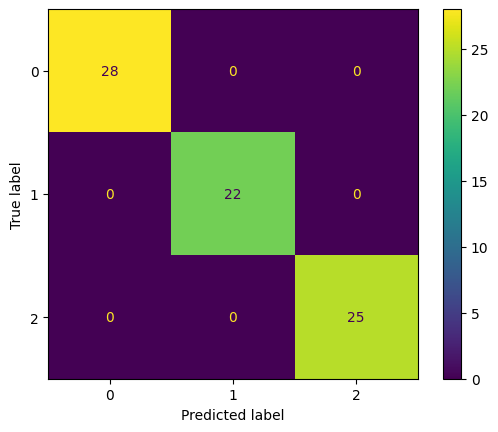

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

cm = confusion_matrix(y_actual, y_predict)
cmDisp = ConfusionMatrixDisplay(confusion_matrix=cm)
cmDisp.plot()
plt.show()

5. Saving Model Weights

In [ ]:
MODEL_PATH = os.path.join("../static-recognition/models")

In [ ]:
model.save(os.path.join(MODEL_PATH, "model_1.h5"))